In [3]:
df = pd.read_csv("train.csv")

df.info()
df.describe(include='all').T
df.isnull().sum().sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64

In [4]:
#.info(), .describe(), .value_counts()

# Step (a)
import pandas as pd

# Basic info
df.info()

# Summary statistics
display(df.describe(include='all').T)

# Missing values count
display(df.isnull().sum().sort_values(ascending=False))

# Value counts for some categorical columns
for col in ['Sex','Pclass','Embarked','Survived']:
    print(f"\n{col} value counts:\n", df[col].value_counts(dropna=False))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Dooley, Mr. Patrick",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64


Sex value counts:
 Sex
male      577
female    314
Name: count, dtype: int64

Pclass value counts:
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Embarked value counts:
 Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

Survived value counts:
 Survived
0    549
1    342
Name: count, dtype: int64


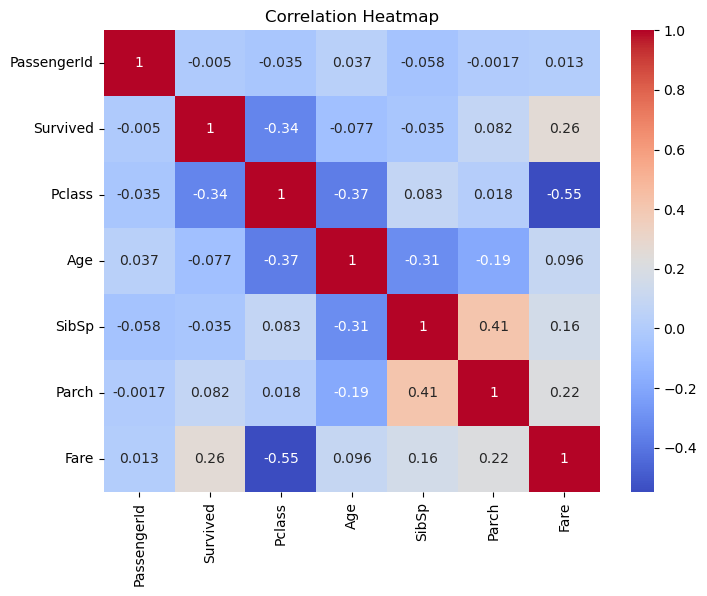

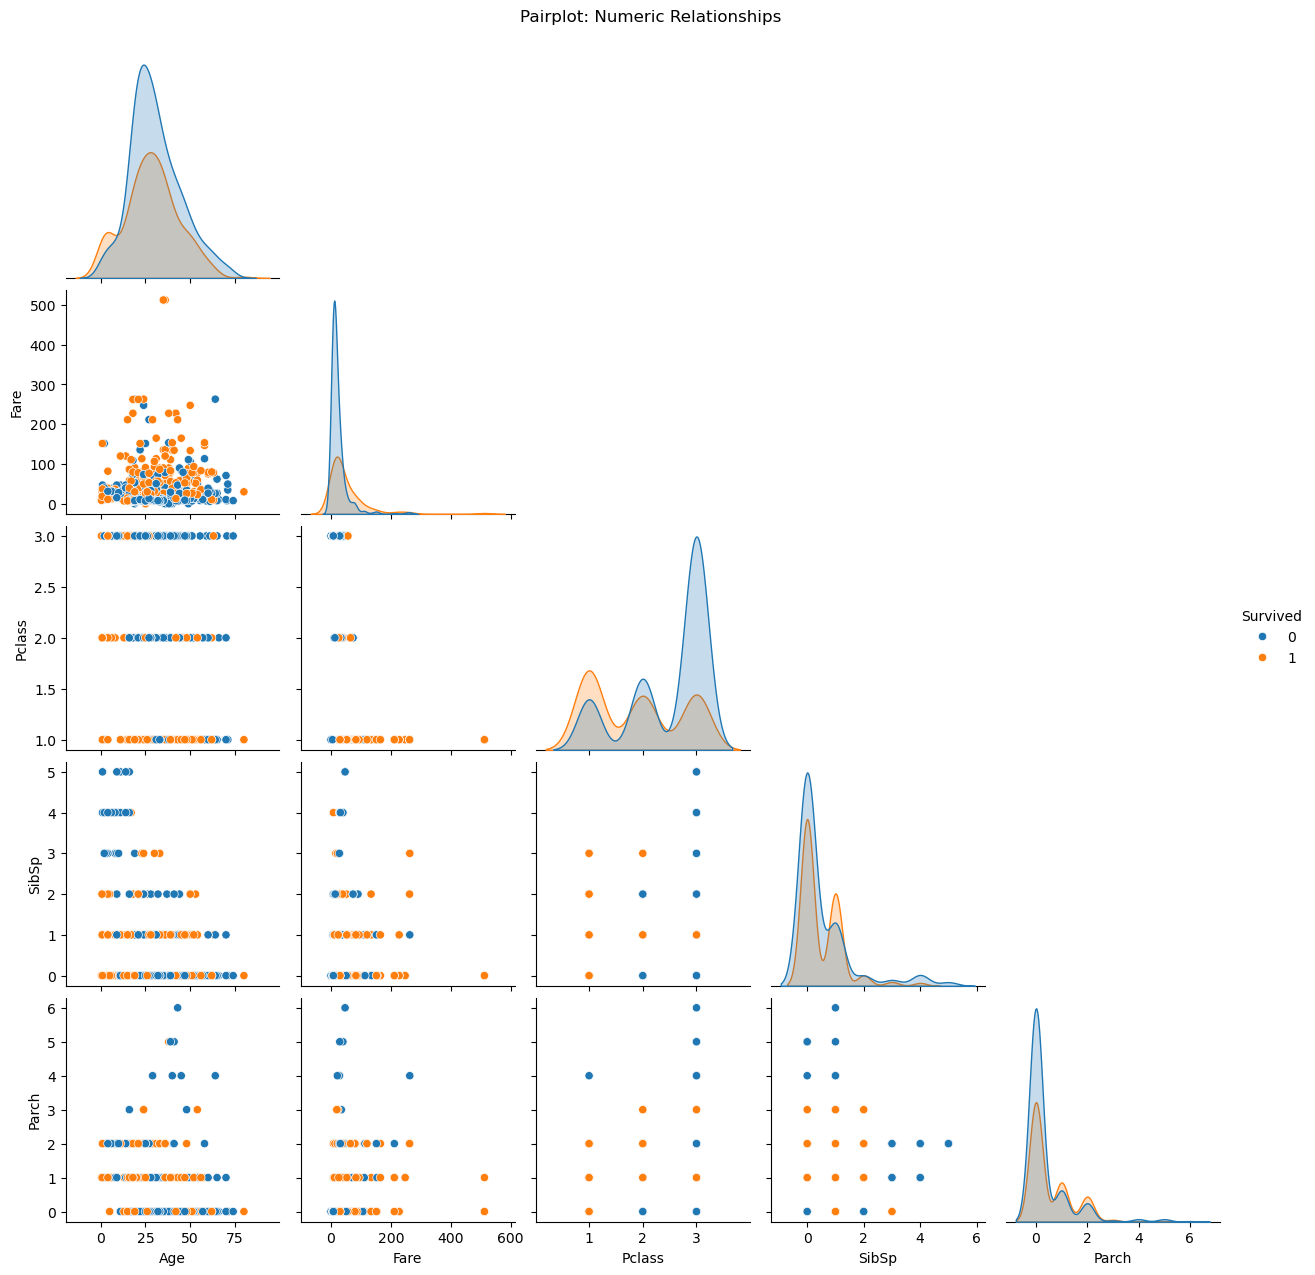

In [5]:
#Use sns.pairplot(), sns.heatmap() for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Pairplot for key numeric columns
sns.pairplot(df[['Survived','Age','Fare','Pclass','SibSp','Parch']].dropna(), hue='Survived', corner=True)
plt.suptitle("Pairplot: Numeric Relationships", y=1.02)
plt.show()


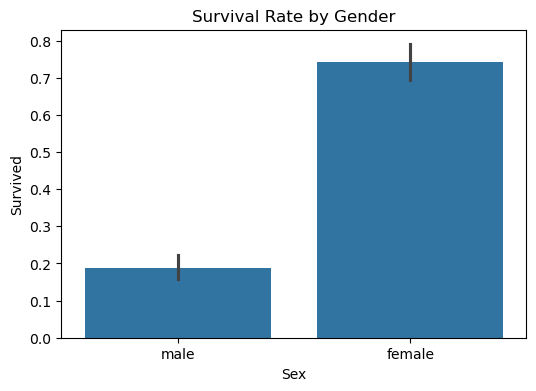

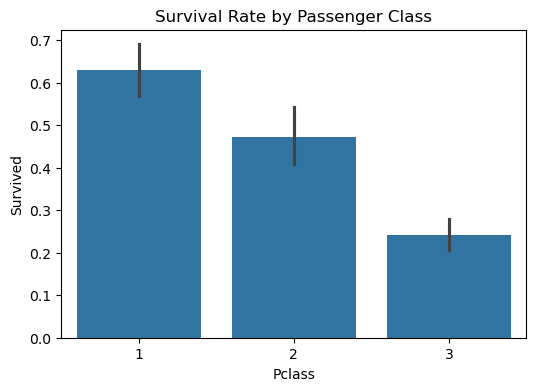

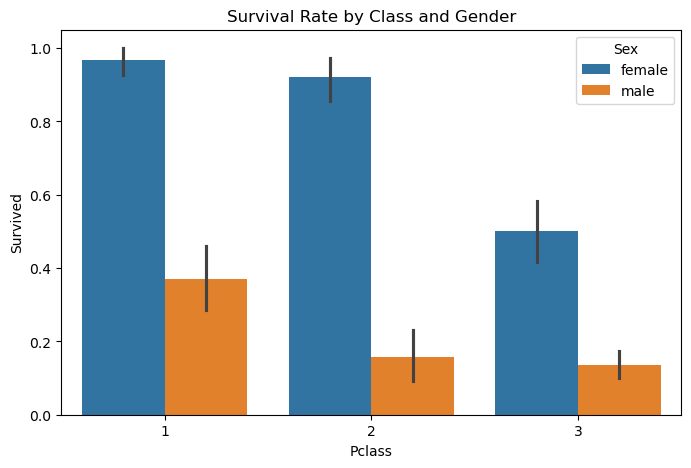

In [6]:
#Identify Relationships & Trends

# Survival rate by gender
plt.figure(figsize=(6,4))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

# Survival rate by class
plt.figure(figsize=(6,4))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

# Combined: Pclass vs Sex
plt.figure(figsize=(8,5))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df)
plt.title('Survival Rate by Class and Gender')
plt.show()


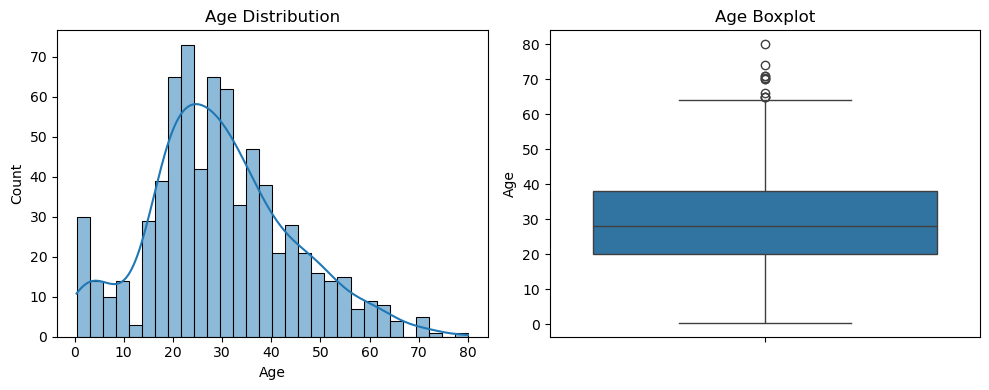

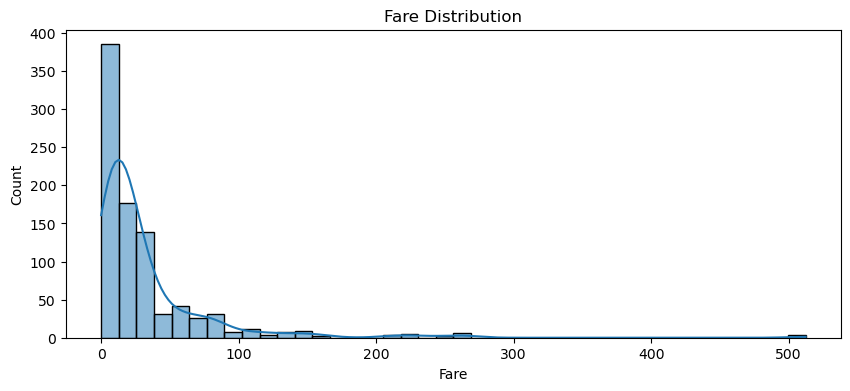

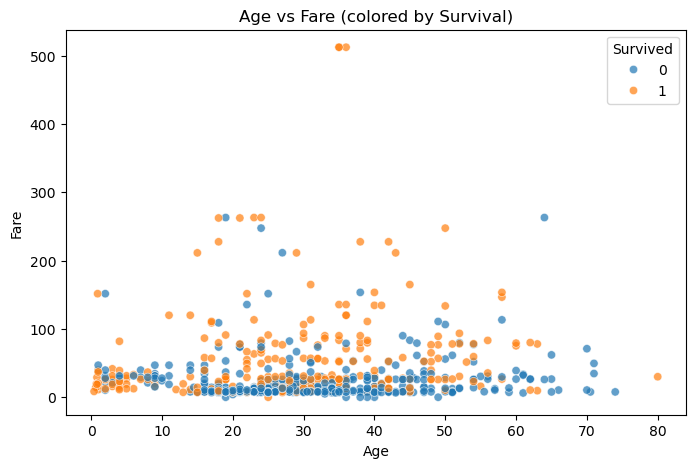

In [7]:
#Histograms, Boxplots, Scatterplots

# Age distribution
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.subplot(1,2,2)
sns.boxplot(y=df['Age'])
plt.title('Age Boxplot')
plt.tight_layout()
plt.show()

# Fare distribution
plt.figure(figsize=(10,4))
sns.histplot(df['Fare'], bins=40, kde=True)
plt.title('Fare Distribution')
plt.show()

# Scatterplot: Age vs Fare
plt.figure(figsize=(8,5))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df, alpha=0.7)
plt.title('Age vs Fare (colored by Survival)')
plt.show()


(e) Write Observations for Each Visual
## Observations

1. Females and 1st class passengers had the highest survival.
2. Age distribution mostly 20–40 years.
3. Fare is right-skewed with high-value outliers.
4. Cabin has large missing values; Embarked minor missing.
5. Correlation shows Fare & Pclass strongly related to survival.


#(f) Provide Summary of Findings
## Summary of Findings

- Total 891 passengers analyzed with 12 attributes.
- Major missing columns: Age (177), Cabin (687), Embarked (2).
- Females survived more (74%) than males (19%).
- 1st class passengers had higher survival (63%) than 3rd class (24%).
- Younger passengers had slightly higher survival rates.
- Fare distribution skewed; rich passengers had better survival chances.
- Key predictors of survival: Sex, Pclass, Fare, Age.
